# k分割交差検証

## ライブラリのインポート

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## データセットのインポート

In [13]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values
X

array([[1.90e+01, 1.90e+04],
       [3.50e+01, 2.00e+04],
       [2.60e+01, 4.30e+04],
       [2.70e+01, 5.70e+04],
       [1.90e+01, 7.60e+04],
       [2.70e+01, 5.80e+04],
       [2.70e+01, 8.40e+04],
       [3.20e+01, 1.50e+05],
       [2.50e+01, 3.30e+04],
       [3.50e+01, 6.50e+04],
       [2.60e+01, 8.00e+04],
       [2.60e+01, 5.20e+04],
       [2.00e+01, 8.60e+04],
       [3.20e+01, 1.80e+04],
       [1.80e+01, 8.20e+04],
       [2.90e+01, 8.00e+04],
       [4.70e+01, 2.50e+04],
       [4.50e+01, 2.60e+04],
       [4.60e+01, 2.80e+04],
       [4.80e+01, 2.90e+04],
       [4.50e+01, 2.20e+04],
       [4.70e+01, 4.90e+04],
       [4.80e+01, 4.10e+04],
       [4.50e+01, 2.20e+04],
       [4.60e+01, 2.30e+04],
       [4.70e+01, 2.00e+04],
       [4.90e+01, 2.80e+04],
       [4.70e+01, 3.00e+04],
       [2.90e+01, 4.30e+04],
       [3.10e+01, 1.80e+04],
       [3.10e+01, 7.40e+04],
       [2.70e+01, 1.37e+05],
       [2.10e+01, 1.60e+04],
       [2.80e+01, 4.40e+04],
       [2.70e+

## フィーチャースケーリング

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## 訓練用とテスト用へのデータセットの分割



In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Kernel SVMモデルを使った訓練用データセットのモデルの訓練

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## テスト用データセットを使った結果の予測

In [17]:
y_pred = classifier.predict(X_test)

## 混同行列の作成

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[64  4]
 [ 3 29]]
0.93


## k分割交差検証の適用

In [26]:
from sklearn.model_selection import cross_val_score
accracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accracies.std()*100))

Accuracy: 90.00 %
Standard Deviation: 6.83 %


## 訓練用データセットを使った結果の可視化

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


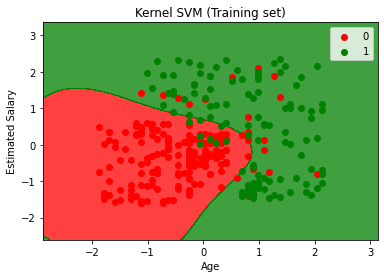

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## テスト用データセットを使った結果の可視化

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


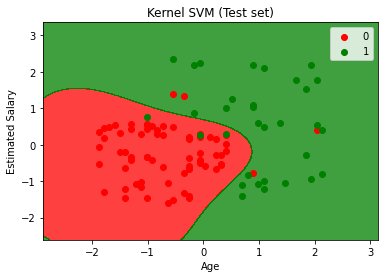

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()